# Unsupervised Learning
1. Unsupervised learning is used often in an exploratory setting
1. As well as a preprocessing step for supervised algorithms

# Preprocessors
1. Learning a new representation of the data can sometimes improve the accuracy of supervised algorithms, or can lead to reduced memory and time consumption, and that's preprocessing
1. This is a simple per-feature rescaling and shift of the data

In [1]:
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
iris_df = pd.read_csv('../data/iris.csv', dtype = {'species': 'category'})
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
X, y = iris_df.iloc[:, :-1], iris_df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

svc = SVC(C = 100)

# MinMaxScaler 
1. It shifts the data such that all features are exactly between 0 and 1

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
svc.fit(X_train, y_train).score(X_test, y_test)

0.97368421052631582

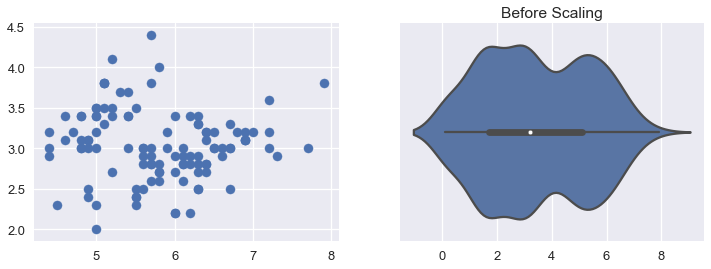

In [7]:
sns.set_context('talk')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(X_train.iloc[:, 0], X_train.iloc[:, 1])
sns.violinplot(X_train)

plt.title('Before Scaling')
plt.show()

In [8]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svc.fit(X_train, y_train).score(X_test, y_test)

1.0

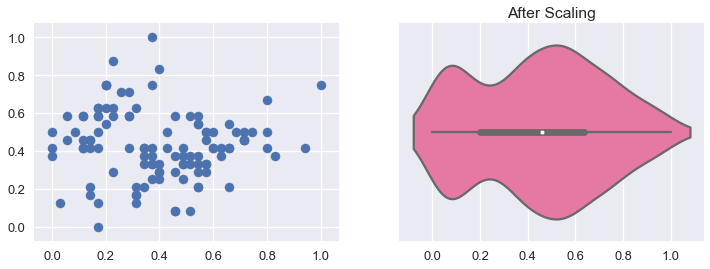

In [9]:
sns.set_context('talk')
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1])
sns.violinplot(X_train, palette = 'RdPu', cut = 1)

plt.title('After Scaling')
plt.show()

# Standard Scaler
1. It ensures that for each feature the **Mean is 0** and the **Variance is 1**, bringing all features to the same magnitude
1. However, this scaling does not ensure any particular minimum and maximum values for the features

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svc.fit(X_train, y_train).score(X_test, y_test)

1.0

# RobustScaler
1. It works similarly to the StandardScaler, but on **Median** and **Quartiles**
1. It is **Outlier Proof** (Measurement Error) which bug the other scalers

In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svc.fit(X_train, y_train).score(X_test, y_test)

1.0

# Normalizer
1. It scales each data point such that the feature vector has a Euclidean length of 1.
1. In other words, it projects a data point on the circle (or sphere, in the case of higher dimensions) with a radius of 1
1. This normalization is often used when only the direction (or angle) of the data matters, not the length of the feature vector

In [14]:
from sklearn.preprocessing import Normalizer

In [15]:
scaler = Normalizer()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svc.fit(X_train, y_train).score(X_test, y_test)

0.97368421052631582